# Load packages

In [1]:
library(ggplot2)
library(data.table)
library(RColorBrewer)
library(patchwork)
library(Giotto)
library(Matrix)

# Set dir

In [2]:
save_dir = "1.align_H3K27me3_to_H3K4me3/2.H3K27me3_giotto/"
if (!dir.exists(save_dir)){dir.create(save_dir)}
setwd(save_dir)

In [3]:
#plot spatial gene for each spatial pattern
SpatPlotFeature <- function(locs_dt,
                            mat,
                            gene,
                            point_size = 0.8,
                            min_value = NULL,
                            max_value = NULL,
                            min_quan = 0,
                            max_quan = 1,
                            title = NULL,
                            pal = NULL){
  expr = mat[gene, locs_dt$cell_ID]
  dt = cbind(locs_dt, expr = expr)
  
  if (is.null(min_value)){
    min_value = quantile(dt$expr, min_quan)
  }
  if (is.null(max_value)){
    max_quan = quantile(dt$expr, max_quan)
  }
  dt[, expr := ifelse(expr < min_value, min_value, expr)]
  dt[, expr := ifelse(expr > max_value, max_value, expr)]
  
  if (is.null(pal)){pal = colorRampPalette(c("blue", "cyan", "lightgrey","yellow", "red"), bias=1)(100)}
  
  p = ggplot(dt, aes(x = x, y = y, color = expr))
  p = p + geom_point(size = point_size)
  p = p + theme_classic()
  p = p + scale_color_gradientn(colours = pal, 
                                breaks = c(floor(min(dt$expr)), floor(max(dt$expr))))
  p = p + theme(line = element_blank(),
                axis.text = element_blank(),
                axis.title = element_blank(),
                legend.text = element_text(size =rel(1), colour = 'black'),
                legend.title = element_text(size =rel(1), colour = 'black'),
                plot.title = element_text(size =rel(1.5), colour = 'black', 
                                          hjust = 0.5))
  p = p + labs(title = title)
  return(p)
}

# 1.get genescore from ArchR

In [3]:
load("/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K27me3_E11_50um/H3K27me3.RData")

H3K27me3

Loading required package: ArchR


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______

class: ArchRProject 
outputDirectory: /sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K27me3_E11_50um 
samples(1): H3K27me3
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 2135
medianTSS(1): 1.783
medianFrags(1): 9788

In [5]:
addGeneScoreMatrix(input = H3K27me3, matrixName = "GeneScoreMatrix_1",useTSS =FALSE,
                   geneModel = "exp(-abs(x)/5000) + exp(-1)", force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGeneScoreMatrix-27764a528054-Date-2024-04-11_Time-10-59-46.log
If there is an issue, please report to github with logFile!

2024-04-11 10:59:46 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

H3K27me3 .addGeneScoreMat useTSS = FALSE

2024-04-11 10:59:58 : Computing Gene Scores using distance relative to GeneBody! , 0.202 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addGeneScoreMatrix-27764a528054-Date-2024-04-11_Time-10-59-46.log


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  

class: ArchRProject 
outputDirectory: /sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K27me3_E11_50um 
samples(1): H3K27me3
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 2135
medianTSS(1): 1.783
medianFrags(1): 9788

In [6]:
gs_obj = getMatrixFromProject(ArchRProj = H3K27me3, useMatrix = "GeneScoreMatrix_1", useSeqnames = NULL, 
                                 verbose = TRUE, binarize = FALSE, threads = getArchRThreads(),logFile = createLogFile("getMatrixFromProject"))

genescore = assay(gs_obj)
genename = as.vector(gs_obj@elementMetadata$name)
rownames(genescore) = genename

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-277636d3adc1-Date-2024-04-11_Time-11-01-17.log
If there is an issue, please report to github with logFile!

2024-04-11 11:01:24 : Organizing colData, 0.124 mins elapsed.

2024-04-11 11:01:24 : Organizing rowData, 0.124 mins elapsed.

2024-04-11 11:01:24 : Organizing rowRanges, 0.124 mins elapsed.

2024-04-11 11:01:24 : Organizing Assays (1 of 1), 0.124 mins elapsed.

2024-04-11 11:01:24 : Constructing SummarizedExperiment, 0.124 mins elapsed.

2024-04-11 11:01:24 : Finished Matrix Creation, 0.13 mins elapsed.



In [9]:
save_dir

[1] "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/03.downstream/1.align_H3K27me3_to_H3K4me3/2.H3K27me3_giotto_gs_model_defalult_not_useTSS/"

In [10]:
saveRDS(genescore,paste0(save_dir, '/genescore.rds'))

In [4]:
genescore = readRDS(paste0(save_dir, '/genescore.rds'))

# 2. Create giotto object

In [7]:
gio = readRDS('/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/03.downstream/1.align_H3K27me3_to_H3K4me3/2.H3K27me3/0.H3K27me3_giotto.rds')
gio

An object of class giotto 
 23955 genes across 1571 samples.
 
Steps and parameters used: 
 
$`0_subset`
cells removed genes removed 
            0           378 

$`1_filter`
                         used expression values 
                                          "raw" 
                      gene expression threshold 
                                          "0.1" 
           minimum # of genes detected per cell 
                                           "10" 
minimum times a gene is detected over all cells 
                                           "10" 


In [6]:
dim(genescore)

[1] 24333  2135

In [7]:
genescore_raw = genescore


# get matrix colnames
mat_colnames = colnames(gio@raw_exprs)
head(mat_colnames)

# get the colnames order 
aligned_id = rownames(gio@raw_exprs)
aligned_id_vec = gio@cell_metadata$aligned
names(aligned_id_vec) =  gio@cell_metadata$cell_ID
aligned_id_vec = aligned_id_vec[mat_colnames]

# get matrix 
genescore_raw  = genescore_raw[rownames(gio@raw_exprs),as.vector(aligned_id_vec)]
colnames(genescore_raw) = gio@cell_metadata$cell_ID

gio@raw_exprs = genescore_raw
gio@norm_expr = genescore_raw

[1] "aligned_1" "aligned_2" "aligned_3" "aligned_4" "aligned_5" "aligned_6"

In [8]:
dim(genescore_raw)

[1] 23955  1571

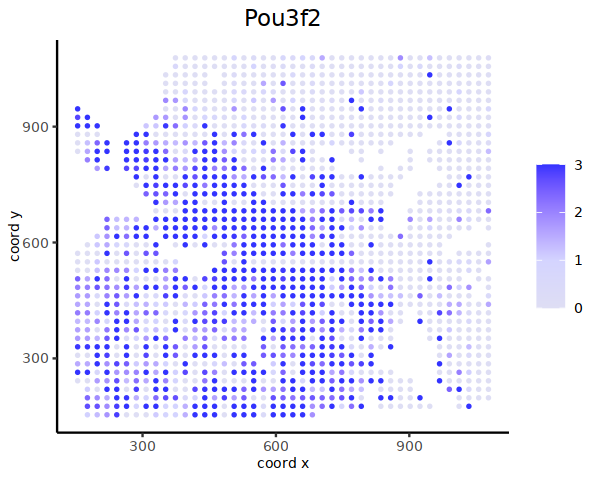

In [9]:
genes = "Pou3f2"
p = spatGenePlot(gio, expression_values = 'normalized',
                 genes = genes,
                 point_shape = 'no_border', point_border_stroke = 0.1,
                 point_size = 0.5, 
                 cow_n_col = 1,
                 cell_color_gradient =c("gray91","#D4D4FF","#3333FF"),
                 gradient_midpoint = 1, gradient_limits = c(0,3),
                 show_plot =F)
options(repr.plot.width = 5, repr.plot.height = 4)
p

In [10]:
dim(gio@norm_expr)

[1] 23955  1571

## filtering

In [11]:
gio <- filterGiotto(gobject = gio, expression_threshold = 0.1,
                        gene_det_in_min_cells = 10, min_det_genes_per_cell = 10,
                        expression_values = c('normalized'), verbose = T)

Number of cells removed:  0  out of  1571 
Number of genes removed:  0  out of  23955 


In [12]:
gio@norm_expr[1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
      aligned_1 aligned_2 aligned_3
Xkr4          .     0.656     .    
Rp1           .     .         0.691
Sox17         .     3.047     2.893

In [13]:
## scale
gio <- normalizeGiotto(gobject = gio, scalefactor = 6000, verbose = T)


 first scale genes and then cells 


In [14]:
gio@norm_scaled_expr[1:3,1:3]

aligned_1  aligned_2  aligned_3 
Xkr4  -0.7493159  0.7960881 -0.8510459
Rp1   -0.6269931 -0.8700974  1.4301435
Sox17 -1.4636572  0.6201457  0.4775939

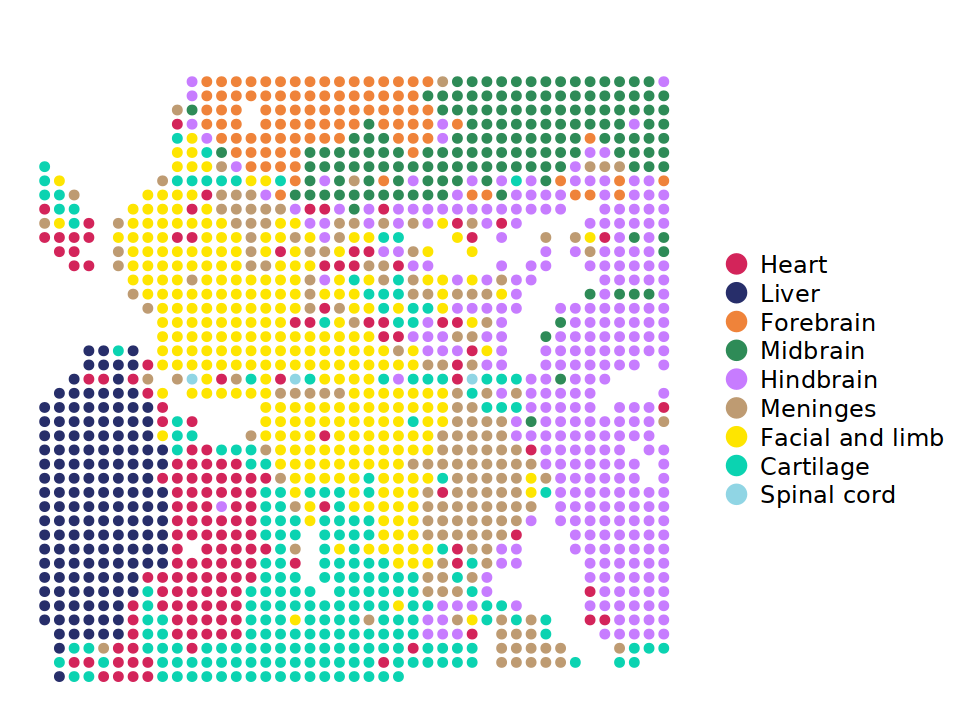

In [15]:
annot_order = c("Heart","Liver","Forebrain","Midbrain","Hindbrain","Meninges", "Facial and limb",
                "Cartilage","Spinal cord")
gio@cell_metadata[, annot := factor(annot, annot_order)]

# set color mode
annot <- c("Meninges", "Facial and limb", "Midbrain", "Hindbrain", "Liver",
           "Cartilage","Forebrain", "Heart", "Spinal cord")
annot_cols <- c("#be9b72ff", "#FEE500", "SeaGreen", "#C77CFF", "#272E6A", 
                "#0bd3b1ff","#ef833aff", "#d3245aff", "#90D5E4")
names(annot_cols) =  annot 

# spatial plot
p1 <- spatPlot(gobject = gio, point_size = 2, title = "",
               cell_color = 'annot',legend_text = 14,legend_symbol_size = 5,
               cell_color_code = annot_cols, 
               point_shape = "no_border", 
               show_plot =F)

p1 = p1 + theme(panel.border = element_blank(),
           axis.text= element_blank(),
           axis.ticks = element_blank(),
           axis.title = element_blank(),
           plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
           legend.text = element_text(size =rel(1.3), colour = 'black'))
options(repr.plot.width = 8, repr.plot.height = 6)
p1


# Create spatial network

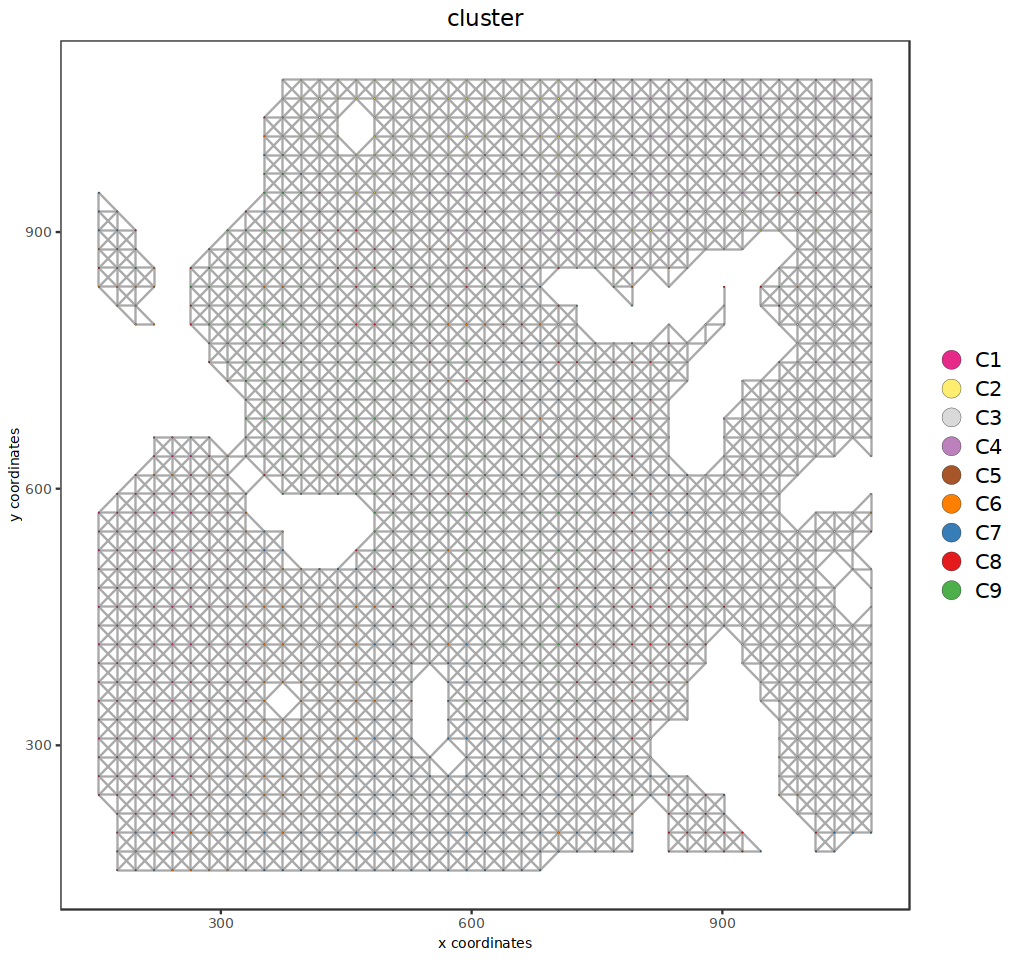

In [16]:
gio= createSpatialNetwork(gobject = gio, method = 'kNN',
                          minimum_k = 0, k=8, maximum_distance_knn = 40)

options(repr.plot.width = 8.5, repr.plot.height = 8)

spatPlot(gobject = gio, show_network = T,
         network_color = 'Darkgrey', spatial_network_name = 'kNN_network',
         point_size = 0.1, cell_color = 'cluster', 
         legend_text = 12, legend_symbol_size = 5,show_plot =F)

In [17]:
max(gio@norm_expr)

[1] 9.383219

In [18]:
min(gio@norm_expr)

[1] 0

# Identify spatial genes

In [98]:
spatialgenes_bS= binSpect(gio,
                           expression_values = "scaled",
                           spatial_network_name = 'kNN_network',
                           calc_hub = TRUE, 
                           cores = 20)


 This is the single parameter version of binSpect
 1. matrix binarization complete 

 2. spatial enrichment test completed 

 3. (optional) average expression of high expressing cells calculated 

 4. (optional) number of high expressing cells calculated 


In [99]:
data.table::setorder(spatialgenes_bS, adj.p.value)
head(spatialgenes_bS)

genes    p.value       estimate  hub_nr adj.p.value   score     av_expr  
1 Rbms1    7.507441e-315 24.102836  146   3.996461e-312 17433.543 2.6801884
2 Cacna2d1 7.507441e-315 10.448032  211   3.996461e-312  7557.045 2.1639154
3 Ets1     7.507441e-315  9.631090  284   3.996461e-312  6966.152 1.8185302
4 Tnrc18   7.507441e-315  9.496721  189   3.996461e-312  6868.963 1.9239997
5 Hoxb3    7.507441e-315  8.905963  752   3.996461e-312  6441.669 0.9675079
6 Frmpd4   7.507441e-315  8.611424 1149   3.996461e-312  6228.629 0.6364581
  high_expr
1  184     
2  254     
3  355     
4  274     
5  794     
6 1174

In [100]:
spatialgenes_bS[, rank := 1:nrow(spatialgenes_bS)]

## plot spatial genes

In [13]:
gs = data.table::copy(gio@norm_expr)
locs = data.table::copy(gio@spatial_locs)
data.table::setnames(locs, new=c("x","y","cell_ID"))
pal_col_K27 = colorRampPalette(c("gray91","#D4D4FF","#3333FF"))(20)
#pal_col_K27 = c("grey91", RColorBrewer::brewer.pal(9,"Blues"))
#3333FF

[1] "Rbms1"    "Cacna2d1" "Ets1"     "Tnrc18"   "Hoxb3"    "Frmpd4"   "Il1rapl2"
[8] "Htatip2"

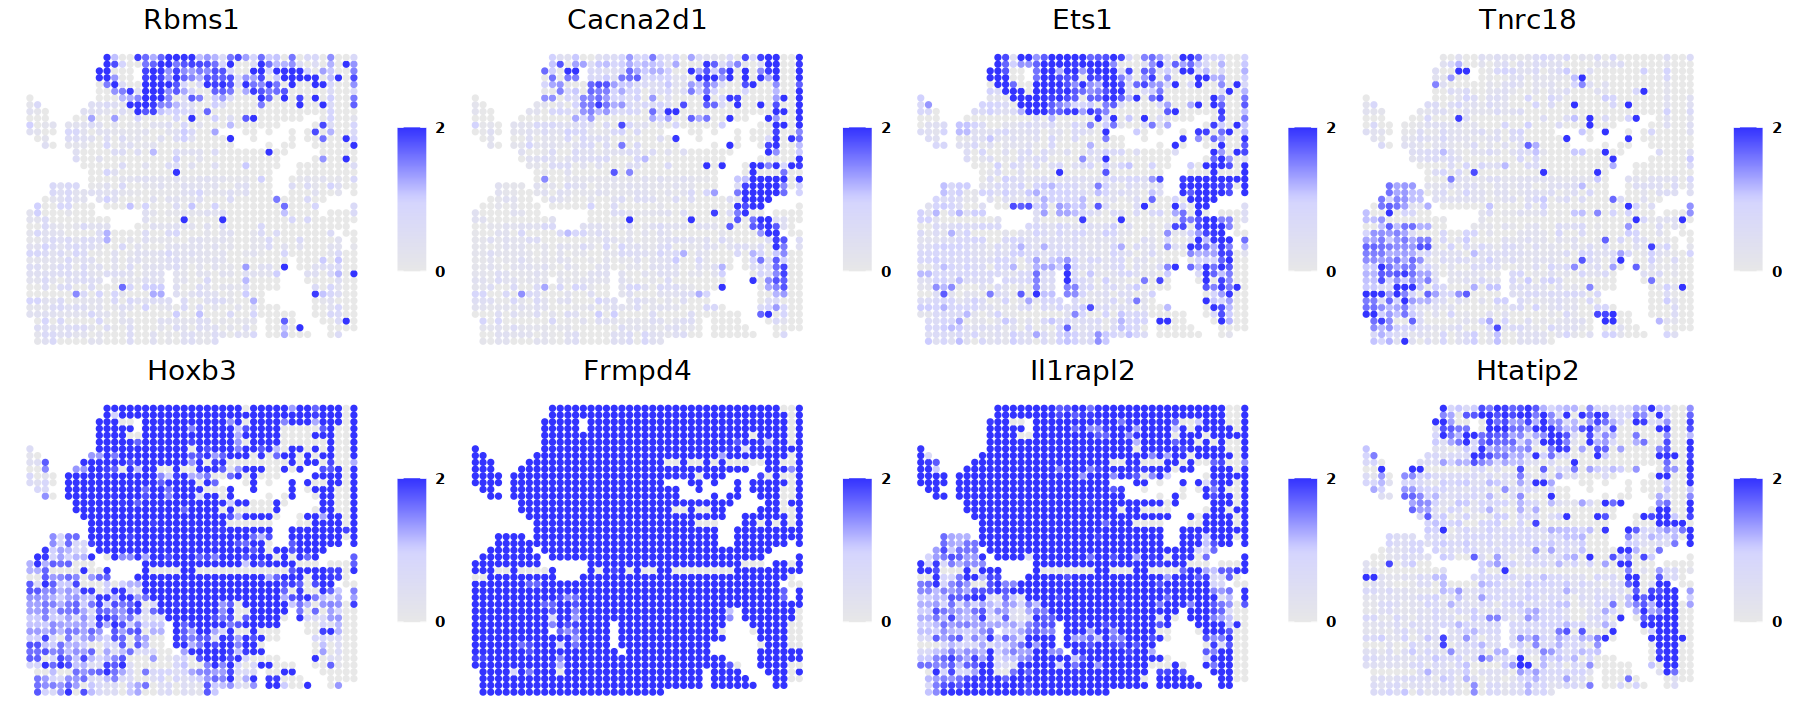

In [14]:


#genes = c("Gata4","Foxg1","Pitx1","Ina")
genes = spatialgenes_bS$genes[1:8]
genes

#titles = c("1\Gata4","5\nFoxg1","4\Pitx1","2\nLhx8","3\nGata1","7\nGata4","6\nHoxa3")
lim_up_all = rep(2,8)

plot_a_list <- function(plot_list, no_of_rows, no_of_cols) {
  patchwork::wrap_plots(plot_list, 
                        nrow = no_of_rows, ncol = no_of_cols)
}


plot_list = list()
for (i in 1:length(genes)){
  gene = genes[i]
  title_text = genes[i]
  lim_up = lim_up_all[i]
  p = SpatPlotFeature(locs_dt = locs, mat = gs, gene = gene, title = title_text,
                      pal = pal_col_K27, point_size = 1,
                      #min_quan = 0.05,
                      #max_quan = 0.995,
                      min_value = 0, max_value = lim_up) +
    guides(color=guide_colorbar(title="gs"))
  p = p + theme(
    #legend.position = "bottom",
    #legend.box = "horizontal",
    #legend.margin = margin(0, 0, 0, 0),
    #legend.box.margin=margin(-10,-10,5,-10),
    plot.margin = margin(0, 0, 0, 0, "pt"),
    legend.title = element_blank(),
    legend.text = element_text(size =rel(0.8), colour = 'black', face = "bold")) 
    #guides(color = guide_colorbar(barheight = 0.8, barwidth = 3, label.position = "bottom",
    #                              label.vjust = 2,label.hjust =0))
  plot_list[[i]] = p
}

p = plot_a_list(plot_list, 2, 4)
options(repr.plot.width = 15, repr.plot.height = 6)
p

[1] "Rarg"  "Nr2e1" "Hoxb3" "Nr2f1"

png 
  2

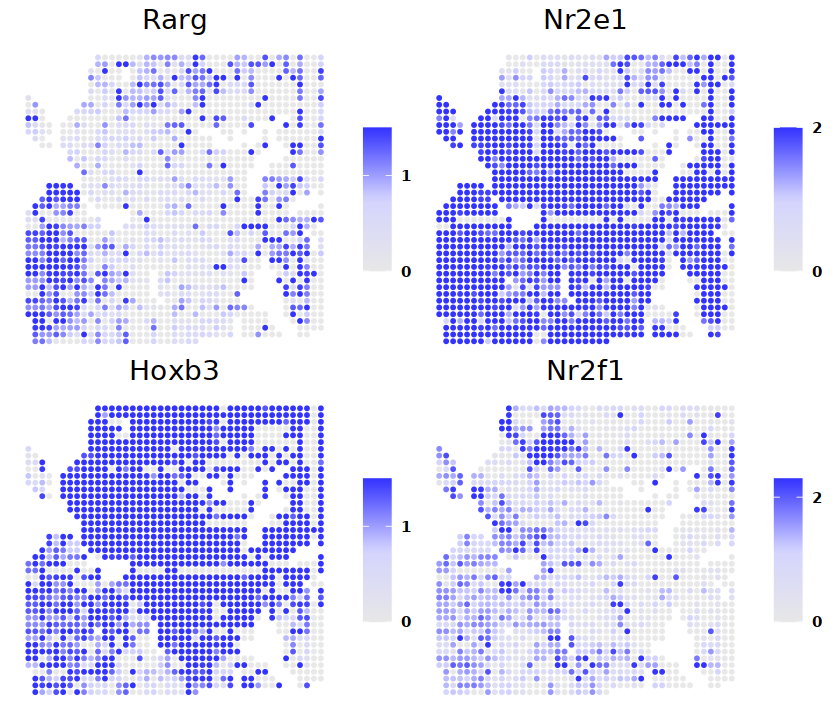

In [20]:


#genes = c("Gata4","Foxg1","Pitx1","Ina")
genes = c("Rarg", "Nr2e1" ,"Hoxb3", "Nr2f1")
genes

#titles = c("1\Gata4","5\nFoxg1","4\Pitx1","2\nLhx8","3\nGata1","7\nGata4","6\nHoxa3")
lim_up_all = c(1.5, 2, 1.5, 2.3)


plot_list = list()
for (i in 1:length(genes)){
  gene = genes[i]
  title_text = genes[i]
  lim_up = lim_up_all[i]
  p = SpatPlotFeature(locs_dt = locs, mat = gs, gene = gene, title = title_text,
                      pal = pal_col_K27, point_size = 0.6,
                      #min_quan = 0.05,
                      #max_quan = 0.995,
                      min_value = 0, max_value = lim_up) +
    guides(color=guide_colorbar(title="gs"))
  p = p + theme(
    #legend.position = "bottom",
    #legend.box = "horizontal",
    #legend.margin = margin(0, 0, 0, 0),
    #legend.box.margin=margin(-10,-10,5,-10),
    plot.margin = margin(0, 0, 0, 0, "pt"),
    legend.title = element_blank(),
    legend.text = element_text(size =rel(0.8), colour = 'black', face = "bold")) 
    #guides(color = guide_colorbar(barheight = 0.8, barwidth = 3, label.position = "bottom",
    #                              label.vjust = 2,label.hjust =0))
  plot_list[[i]] = p
}

p = plot_a_list(plot_list, 2, 2)
options(repr.plot.width = 7, repr.plot.height = 6)
p



[1] "Gata6"  "Pou3f2" "Lbx1"

png 
  2

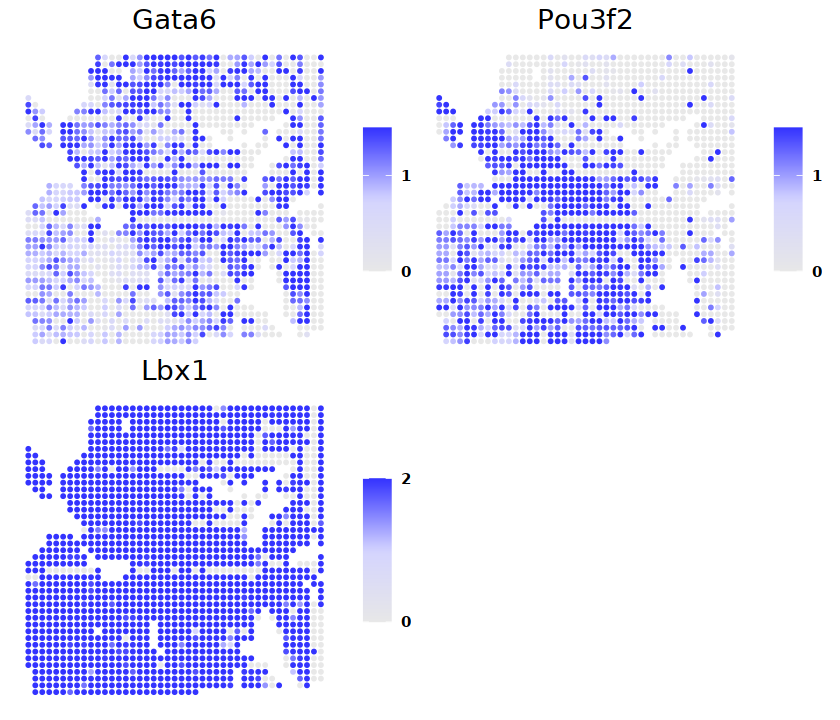

In [80]:

#genes = c("Gata4","Foxg1","Pitx1","Ina")
genes = c("Gata6", "Pou3f2" ,"Lbx1")
genes

#titles = c("1\Gata4","5\nFoxg1","4\Pitx1","2\nLhx8","3\nGata1","7\nGata4","6\nHoxa3")
lim_up_all = c(1.5, 1.5, 2)


plot_list = list()
for (i in 1:length(genes)){
  gene = genes[i]
  title_text = genes[i]
  lim_up = lim_up_all[i]
  p = SpatPlotFeature(locs_dt = locs, mat = gs, gene = gene, title = title_text,
                      pal = pal_col_K27, point_size = 0.6,
                      #min_quan = 0.05,
                      #max_quan = 0.995,
                      min_value = 0, max_value = lim_up) +
    guides(color=guide_colorbar(title="gs"))
  p = p + theme(
    #legend.position = "bottom",
    #legend.box = "horizontal",
    #legend.margin = margin(0, 0, 0, 0),
    #legend.box.margin=margin(-10,-10,5,-10),
    plot.margin = margin(0, 0, 0, 0, "pt"),
    legend.title = element_blank(),
    legend.text = element_text(size =rel(0.8), colour = 'black', face = "bold")) 
    #guides(color = guide_colorbar(barheight = 0.8, barwidth = 3, label.position = "bottom",
    #                              label.vjust = 2,label.hjust =0))
  plot_list[[i]] = p
}

p = plot_a_list(plot_list, 2, 2)
options(repr.plot.width = 7, repr.plot.height = 6)
p


# Spatial pattern for top 200

In [21]:
spatialgenes_bS_tmp = spatialgenes_bS[hub_nr > 100]
spatialgenes_bS_tmp[, rank := 1:nrow(spatialgenes_bS_tmp)]

# select top 200 spatial genes 
gene_num = 200
genes_sel = spatialgenes_bS_tmp[1:gene_num]$genes
sort(genes_sel)

[1] "2610027K06Rik" "2810410L24Rik" "2900092D14Rik" "5033428I22Rik"
  [5] "A230083G16Rik" "A630012P03Rik" "A930004D18Rik" "Adgrg2"       
  [9] "Alpk1"         "Ammecr1"       "Arhgap6"       "Ascl1"        
 [13] "Ass1"          "AV026068"      "B130024G19Rik" "BC106179"     
 [17] "Bcas3os1"      "C130071C03Rik" "Cacna2d1"      "Cask"         
 [21] "Casz1"         "Ccdc88c"       "Cdh22"         "Cdkl5"        
 [25] "Cdon"          "Cfap77"        "Chrdl1"        "Col4a6"       
 [29] "Cplx4"         "Crabp2"        "D930007P13Rik" "Dbn1"         
 [33] "Diaph2"        "Dmd"           "Dusp8"         "Eda"          
 [37] "En1"           "Ets1"          "Evx1os"        "Foxa2"        
 [41] "Frmpd3"        "Frmpd4"        "Fto"           "Gata4"        
 [45] "Gm10421"       "Gm14424"       "Gm15050"       "Gm1720"       
 [49] "Gm20554"       "Gm29683"       "Gm30731"       "Gm53"         
 [53] "Gm8817"        "Gpc3"          "Gpc4"          "Gpm6b"        
 [57] "Gucy2f"        "Haglr"         "Hand2"         "Hdac8"        
 [61] "Hes1"          "Hes5"          "Hotairm1"      "Hotairm2"     
 [65] "Hoxa1"         "Hoxa13"        "Hoxa2"         "Hoxa3"        
 [69] "Hoxa4"         "Hoxaas2"       "Hoxaas3"       "Hoxb1"        
 [73] "Hoxb13"        "Hoxb2"         "Hoxb3"         "Hoxb4"        
 [77] "Hoxb5"         "Hoxb5os"       "Hoxc13"        "Hoxc4"        
 [81] "Hoxd3"         "Hoxd3os1"      "Hoxd4"         "Hs6st2"       
 [85] "Htatip2"       "Id2"           "Id3"           "Igdcc3"       
 [89] "Il1rapl1"      "Il1rapl2"      "Iqsec2"        "Irx2"         
 [93] "Irx3"          "Irx5"          "Kiz"           "Klf8"         
 [97] "Lhfpl1"        "Lman1"         "Lrba"          "Lrmda"        
[101] "Lrrc4b"        "Mageb16-ps1"   "Mbnl3"         "Meis1"        
[105] "Meis2"         "Mid1"          "Mid2"          "Mir10a"       
[109] "Mir10b"        "Mir124-2hg"    "Mir124a-2"     "Mir124a-3"    
[113] "Mir3093"       "Mir9-3"        "Mir9-3hg"      "Msl3"         
[117] "Nfix"          "Nhs"           "Nhsl2"         "Nkx2-2"       
[121] "Nkx2-2os"      "Nox1"          "Nr2e1"         "Nr2f1"        
[125] "Nrk"           "Nrxn2"         "Nyx"           "Opa1"         
[129] "Ophn1"         "Pak3"          "Pantr1"        "Pantr2"       
[133] "Pax1"          "Pax3"          "Pax7"          "Pcdhga1"      
[137] "Pcdhga10"      "Pcdhga11"      "Pcdhga2"       "Pcdhga3"      
[141] "Pcdhga4"       "Pcdhga5"       "Pcdhga6"       "Pcdhga7"      
[145] "Pcdhga8"       "Pcdhga9"       "Pcdhgb1"       "Pcdhgb2"      
[149] "Pcdhgb4"       "Pcdhgb5"       "Pcdhgb6"       "Pcdhgb7"      
[153] "Phex"          "Plac1"         "Pou3f2"        "Ppef1"        
[157] "Ptms"          "Rai2"          "Rarg"          "Rbms1"        
[161] "Reps2"         "Rhcg"          "Rnf138rt1"     "Rps6ka3"      
[165] "Rragd"         "Rtl4"          "Sall2"         "Scml2"        
[169] "Serinc2"       "Sh3kbp1"       "Shroom2"       "Six1"         
[173] "Six3os1"       "Skap2"         "Skida1"        "Slc16a2"      
[177] "Smc1a"         "Sox1"          "Sox1ot"        "Sox2"         
[181] "Sox2ot"        "Sox5"          "Sp8"           "Tal1"         
[185] "Tbx2"          "Tbx20"         "Tbx3"          "Tbx3os2"      
[189] "Tbx5"          "Tfap2b"        "Tlx1"          "Tmem164"      
[193] "Tnrc18"        "Trpc5"         "Tsc22d3"       "Tubb2b"       
[197] "Zdhhc15"       "Zfp503"        "Zic3"          "Zic4"

In [22]:
# 1. calculate gene spatial correlation and single-cell correlation 
# create spatial correlation object
spat_cor_netw_DT = detectSpatialCorGenes(gio, 
                                         expression_values = "scaled",
                                         method = 'network', 
                                         spatial_network_name = 'kNN_network',
                                         subset_genes = genes_sel)

saveRDS(spat_cor_netw_DT, paste0(save_dir,'2.spat_cor_netw_DT.Top',gene_num,'.rds'))

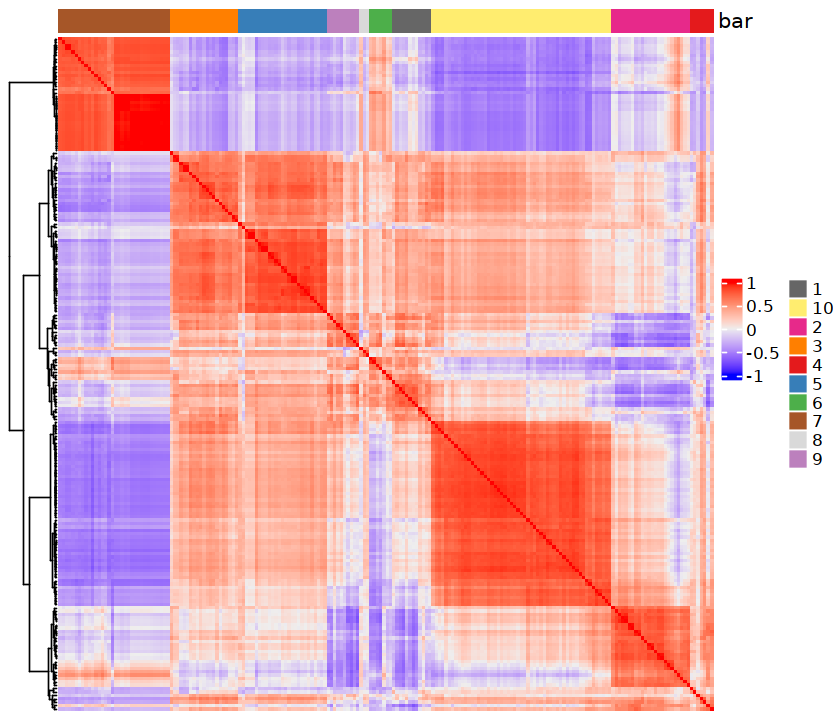

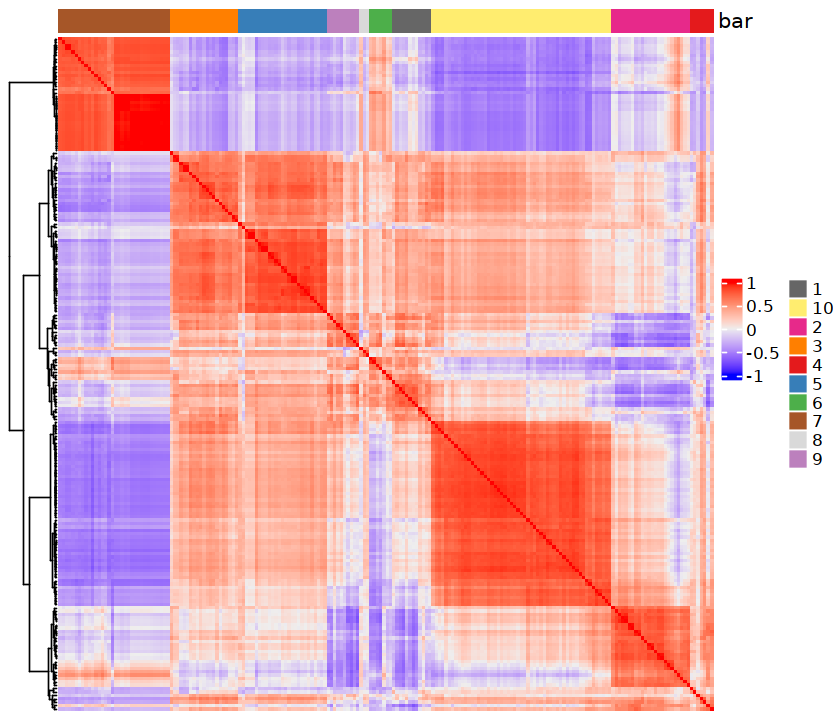

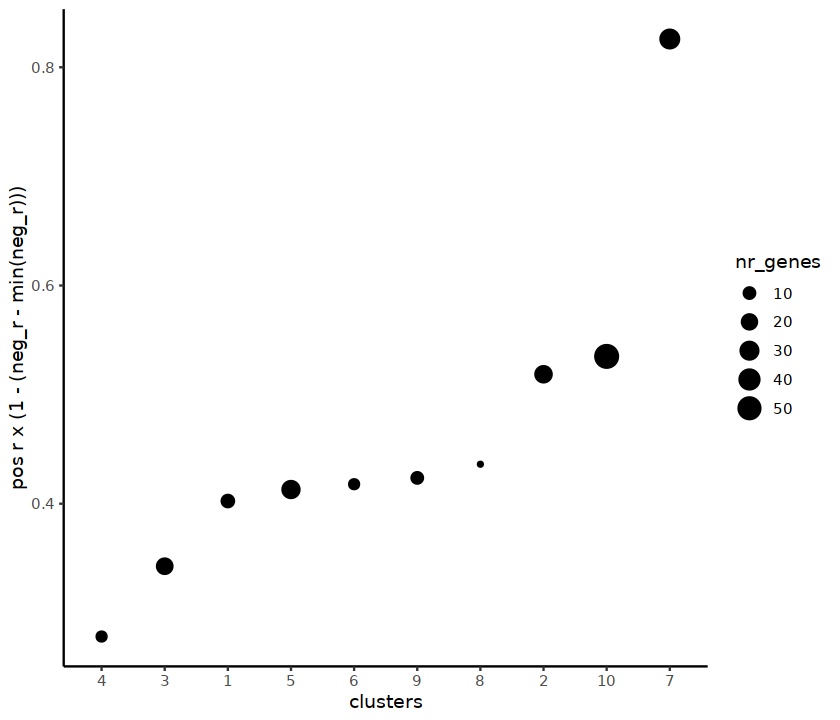

In [23]:
# 2. cluster correlated genes & visualize
#hclust_method: "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA),
#"median" (= WPGMC) or "centroid" (= UPGMC).
# canditate : (complete, 8);(mcquitty, 8) ward.D2
spat_cor_netw_DT_clus = clusterSpatialCorGenes(spat_cor_netw_DT, 
                                               name = 'spat_netw_clus', 
                                               hclust_method = 'ward.D2',
                                               k = 10)
options(repr.plot.width = 7, repr.plot.height = 6)
heatmSpatialCorGenes(gio, spatCorObject = spat_cor_netw_DT_clus, use_clus_name = 'spat_netw_clus',
                     heatmap_legend_param = list(title = NULL))

# 3. rank spatial correlated clusters and show genes for selected clusters
options(repr.plot.width = 7, repr.plot.height = 6)
netw_ranks = rankSpatialCorGroups(gio, spatCorObject = spat_cor_netw_DT_clus, 
                                  use_clus_name = 'spat_netw_clus')

# 4. create metagene enrichment score for clusters
cluster_genes = spat_cor_netw_DT_clus$cor_clusters$spat_netw_clus
gio = createMetagenes(gio, expression_values = "normalized",
                      gene_clusters = cluster_genes, name = 'cluster_metagene')

clus_meta = data.table::copy(gio@spatial_enrichment$cluster_metagene)
cell_ID = clus_meta$cell_ID
clus_meta = clus_meta[,cell_ID := NULL]
clus_meta = t(as.matrix(clus_meta))
colnames(clus_meta) = cell_ID

locs = data.table::copy(gio@spatial_locs)
data.table::setnames(locs, new=c("x","y","cell_ID"))
pal_col_K27 = colorRampPalette(c("gray91","#D4D4FF","#3333FF"))(20)


saveRDS(spat_cor_netw_DT_clus, paste0(save_dir,'2.spat_cor_netw_DT_clus.Top',gene_num,'.rds'))

In [22]:
gene_num = 200
spat_cor_netw_DT_clus = readRDS(paste0(save_dir,'2.spat_cor_netw_DT_clus.Top',gene_num,'.rds'))

In [23]:
# 4. create metagene enrichment score for clusters
cluster_genes = spat_cor_netw_DT_clus$cor_clusters$spat_netw_clus
gio = createMetagenes(gio, expression_values = "normalized",
                      gene_clusters = cluster_genes, name = 'cluster_metagene')

In [24]:
clus_meta = data.table::copy(gio@spatial_enrichment$cluster_metagene)
cell_ID = clus_meta$cell_ID
clus_meta = clus_meta[,cell_ID := NULL]
clus_meta = t(as.matrix(clus_meta))
colnames(clus_meta) = cell_ID

locs = data.table::copy(gio@spatial_locs)
data.table::setnames(locs, new=c("x","y","cell_ID"))
pal_col_K27 = colorRampPalette(c("gray91","#D4D4FF","#3333FF"))(20)

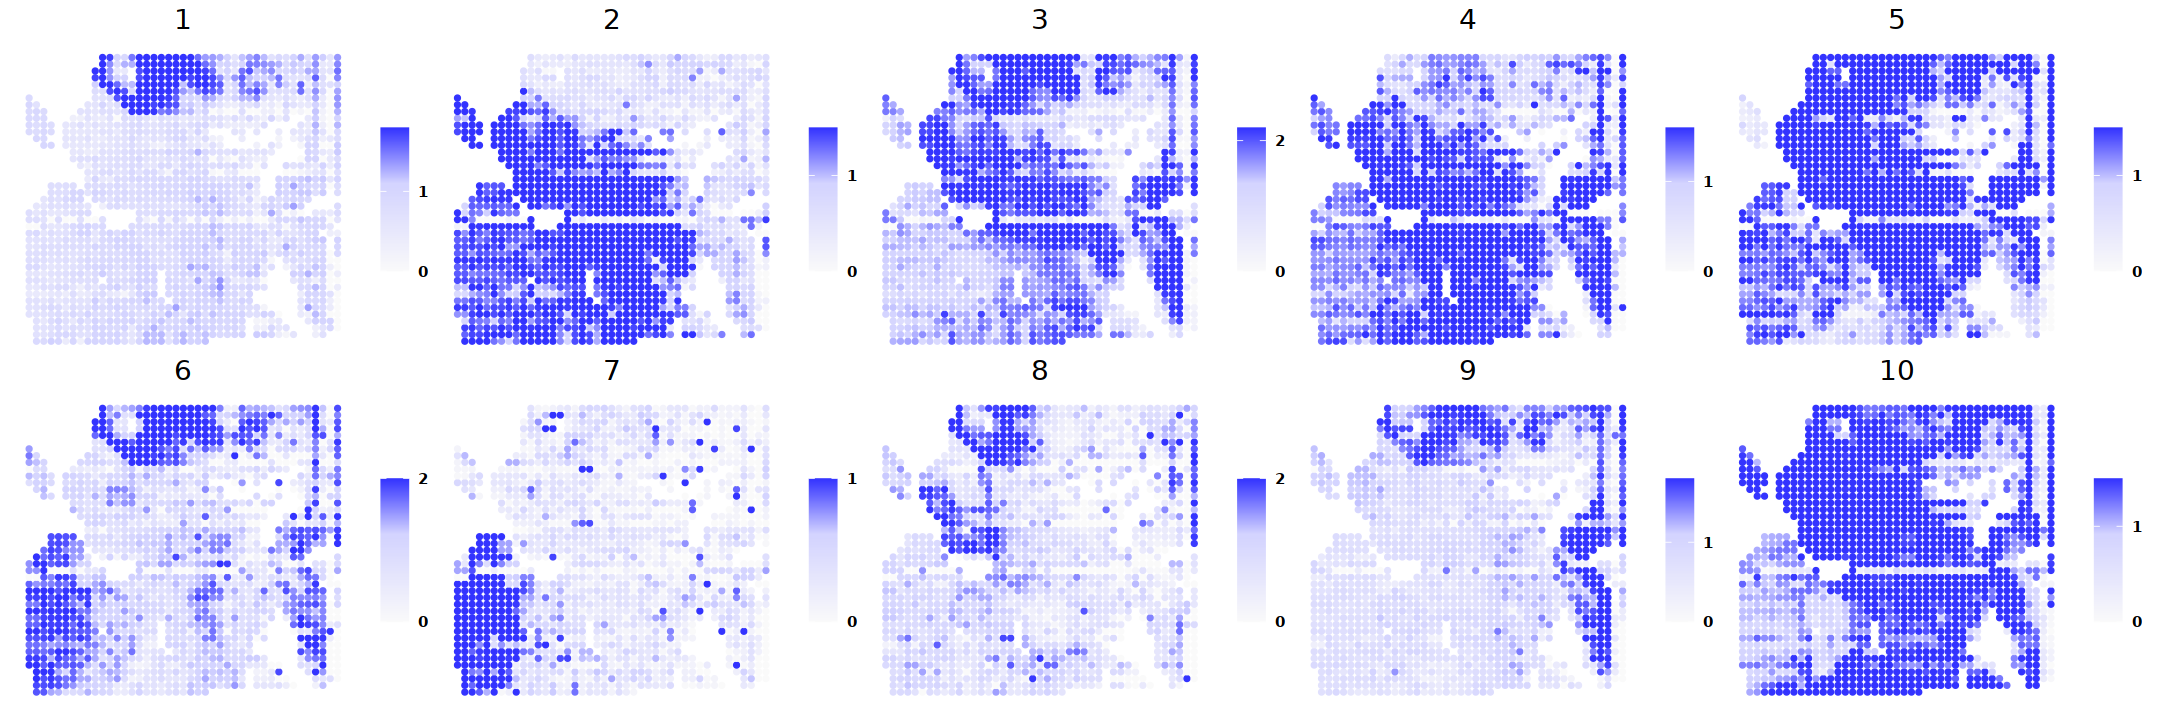

In [26]:
genes      = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
#genes      = c(6, 7, 2, 3, 9,  5,  10,  8, 1,  4)
lim_up_all = c(1.8,1.5, 2.2, 1.6,1.5, 2,1, 2,1.8,1.5)
#lim_up_all = rep(2,10)


pal_col_K27 = c(colorRampPalette(c("#FAFAFA","#D4D4FF"))(30),
                colorRampPalette(c("#D4D4FF","#3333FF"))(20))


#E9E9E9
#F5F5F5


plot_a_list <- function(plot_list, no_of_rows, no_of_cols) {
  patchwork::wrap_plots(plot_list, 
                        nrow = no_of_rows, ncol = no_of_cols)
}

plot_list = list()
for (i in 1:length(genes)){
  gene = genes[i]
  title_text = genes[i]
  lim_up = lim_up_all[i]
  p = SpatPlotFeature(locs_dt = locs, mat = clus_meta, gene = gene, title = title_text,
                      pal = pal_col_K27, point_size = 01,
                      min_quan = 0.0,
                      max_quan = 1,
                      min_value = 0, max_value = lim_up) +
    guides(color=guide_colorbar(title="gs"))
  p = p + theme(
    plot.margin = margin(0, 0, 0, 0, "pt"),
    legend.title = element_blank(),
    legend.text = element_text(size =rel(0.8), colour = 'black', face = "bold")) 

  plot_list[[i]] = p
}

p = plot_a_list(plot_list, 2, 5)
options(repr.plot.width = 18, repr.plot.height = 6)
p

In [27]:
table(cluster_genes)

cluster_genes
 1  2  3  4  5  6  7  8  9 10 
12 24 21  7 27  7 34  3 10 55 

# Plot correspond H3K4me3

In [ ]:
gio_H3K4me3 = readRDS('0.H3K4me3_giotto.rds')

In [52]:
#  create metagene enrichment score for clusters
cluster_genes = spat_cor_netw_DT_clus$cor_clusters$spat_netw_clus
gio_H3K4me3 = createMetagenes(gio_H3K4me3, expression_values = "normalized",
                      gene_clusters = cluster_genes, name = 'cluster_metagene')

clus_meta_K4 = data.table::copy(gio_H3K4me3@spatial_enrichment$cluster_metagene)
cell_ID_K4 = clus_meta_K4$cell_ID
clus_meta_K4 = clus_meta_K4[,cell_ID := NULL]
clus_meta_K4 = t(as.matrix(clus_meta_K4))
colnames(clus_meta_K4) = cell_ID_K4

locs_K4 = data.table::copy(gio_H3K4me3@spatial_locs)
data.table::setnames(locs_K4, new=c("x","y","cell_ID"))


  cluster_metagene  has already been used, will be overwritten 


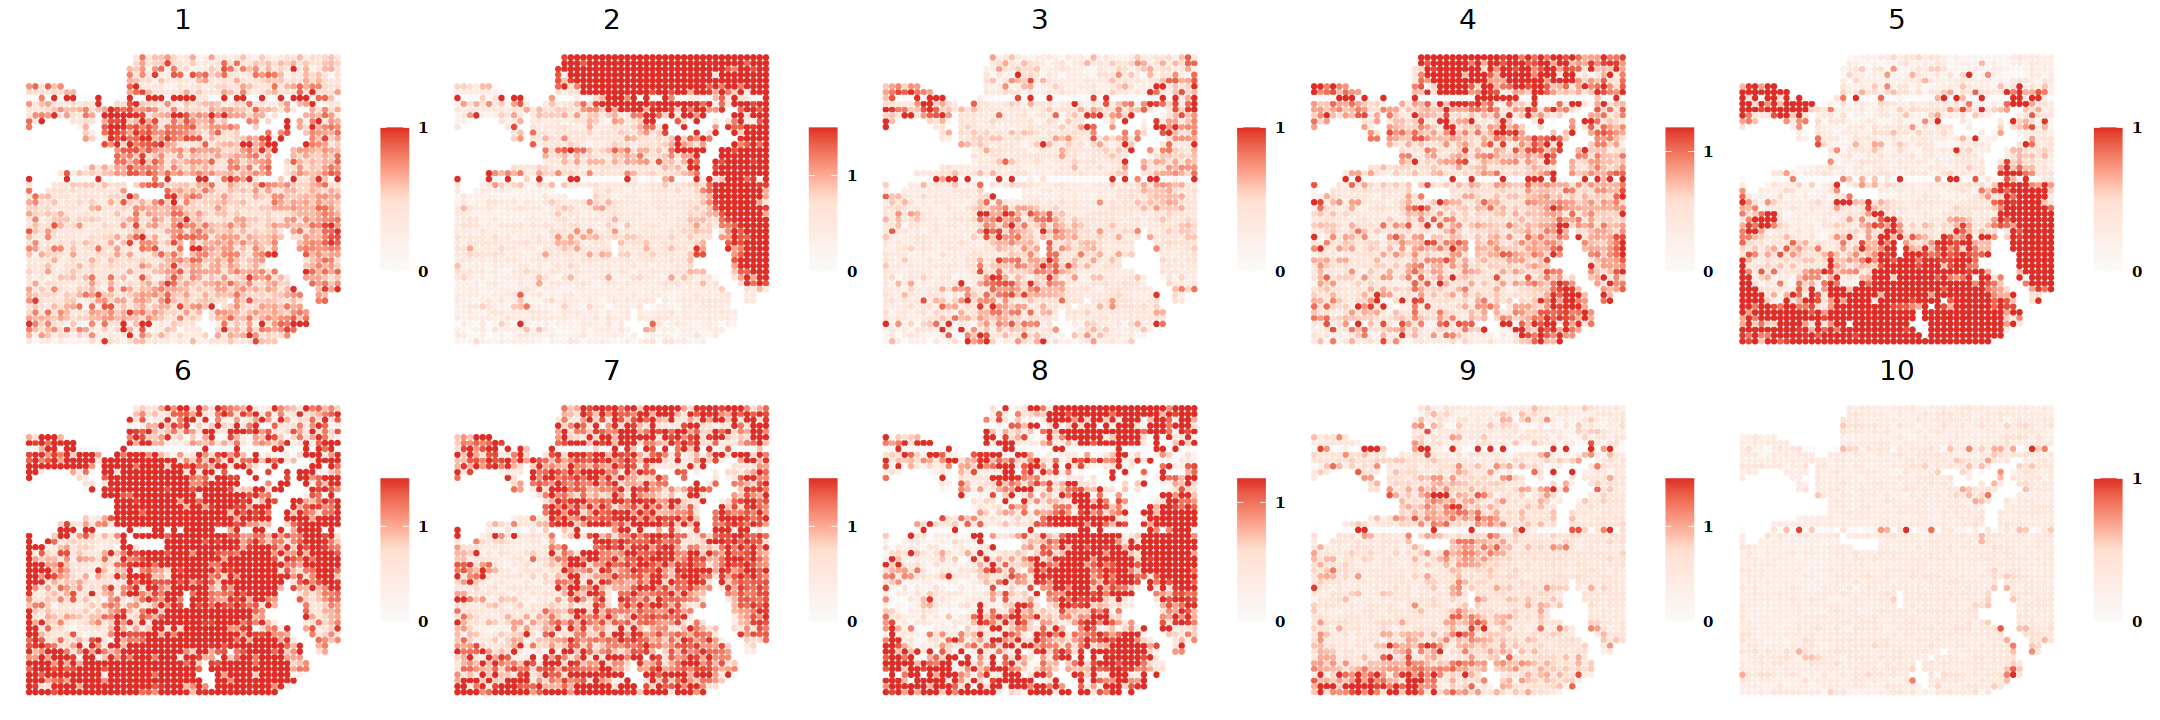

In [53]:
genes      = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
#genes      = c(6, 7, 2, 3, 9,  5,  10,  8, 1,  4)
lim_up_all =c(1, 1.5, 1, 1.2, 1,
              1.5, 1.5, 1.2,1.5,1)
#lim_up_all = rep(1.5, length(genes))


pal_col_K4 = c("#FAFAFA","#FEE0D2", "#DE2D26")

#E9E9E9
#F5F5F5


plot_a_list <- function(plot_list, no_of_rows, no_of_cols) {
  patchwork::wrap_plots(plot_list, 
                        nrow = no_of_rows, ncol = no_of_cols)
}

plot_list = list()
for (i in 1:length(genes)){
  gene = genes[i]
  title_text = genes[i]
  lim_up = lim_up_all[i]
  p = SpatPlotFeature(locs_dt = locs_K4, mat = clus_meta_K4, gene = gene, title = title_text,
                      pal = pal_col_K4, point_size = 0.8,
                      min_quan = 0.0,
                      max_quan = 1,
                      min_value = 0, max_value = lim_up) +
    guides(color=guide_colorbar(title="gs"))
  p = p + theme(
    plot.margin = margin(0, 0, 0, 0, "pt"),
    legend.title = element_blank(),
    legend.text = element_text(size =rel(0.8), colour = 'black', face = "bold")) 

  plot_list[[i]] = p
}

p = plot_a_list(plot_list, 2, 5)
options(repr.plot.width = 18, repr.plot.height = 6)
p